# Lab 5

## Higgs Classification

In this problem we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data [A. Schuy]. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet[Phys. Rev. Lett. 120, 071802 (2018)]. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

Both of you will use the same training samples for analysis. Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR' [Eur. Phys. J. C 79 (2019) 836]. You can explore different strategies for event selection optimization using training samples. The optimal event selection will be applied to pseudo-experiment data.

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pickle

In [2]:
higgs_file = open("Higgs_data/Sample_pt_250_500/higgs_100000_pt_250_500.pkl", 'rb')
higgs_dict = pickle.load(higgs_file)
qcd_file = open("Higgs_data/Sample_pt_250_500/qcd_100000_pt_250_500.pkl", 'rb')
qcd_dict = pickle.load(qcd_file)

print(higgs_dict.keys()) # qcd_dict has same keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [3]:
# Lets explore the data!

pt_h = higgs_dict['pt']
eta_h = higgs_dict['eta']
phi_h = higgs_dict['phi']
mass_h = higgs_dict['mass']
ee2_h = higgs_dict['ee2']
ee3_h = higgs_dict['ee3']
d2_h = higgs_dict['d2']
ang_h = higgs_dict['angularity']
t1_h = higgs_dict['t1']
t2_h = higgs_dict['t2']
t3_h = higgs_dict['t3']
t21_h = higgs_dict['t21']
t32_h = higgs_dict['t32']
KtDeltaR_h = higgs_dict['KtDeltaR']

pt_q = qcd_dict['pt']
eta_q = qcd_dict['eta']
phi_q = qcd_dict['phi']
mass_q = qcd_dict['mass']
ee2_q = qcd_dict['ee2']
ee3_q = qcd_dict['ee3']
d2_q = qcd_dict['d2']
ang_q = qcd_dict['angularity']
t1_q = qcd_dict['t1']
t2_q = qcd_dict['t2']
t3_q = qcd_dict['t3']
t21_q = qcd_dict['t21']
t32_q = qcd_dict['t32']
KtDeltaR_q = qcd_dict['KtDeltaR']

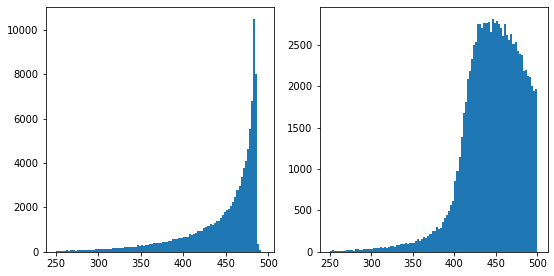

In [4]:
# higgs is the higgs candidate jets
# qcd is the expected background distribution

# pt is the transverse momentum of the jet, lets histogram plot them. 
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(pt_h, bins=100);
axes[1].hist(pt_q, bins=100);

These plots indicate that there is a large descrepancy between the background QCD data and the higgs data based on the momentum of the particles. 

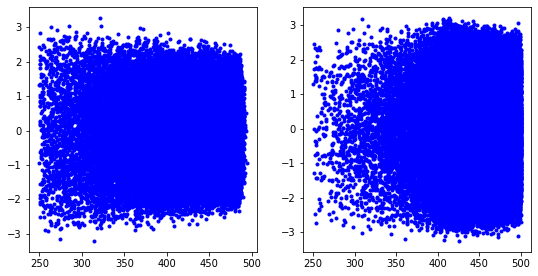

In [5]:
# eta is the pseudorapidity of the jet, and describes the angle of the 
# particle to the axis. It is related to momentum, so lets plot those 
# together.

figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, eta_h, '.b');
axes[1].plot(pt_q, eta_q, '.b');

This did not appear to produce anything of value. Lets return to this later with phi.

This is the azimuthal angle from the beam axis, unlike the polar angle which is related to eta. Lets also graph this against momentum, as they will also be related.

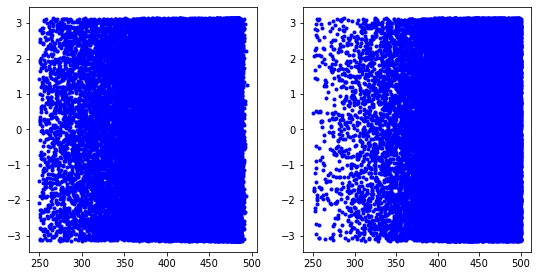

In [7]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, phi_h, '.b');
axes[1].plot(pt_q, phi_q, '.b');

Again, this is uneventful. Lets check this against pseudorapidity, see if they have a correlation.

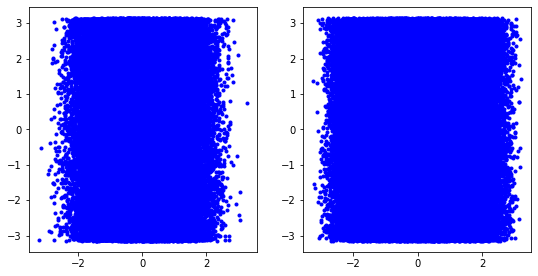

In [8]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, phi_h, '.b');
axes[1].plot(eta_q, phi_q, '.b');

This also seems fairly uneventful.

Now lets look at mass. Mass is going to be in eV since this is particle physics. Lets see a mass histogram.

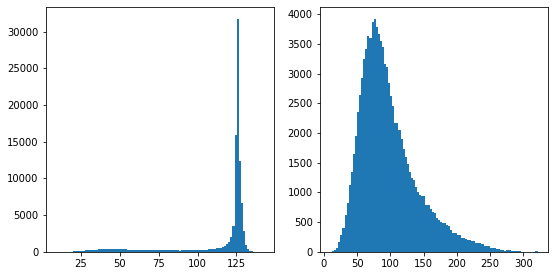

In [9]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(mass_h, bins=100);
axes[1].hist(mass_q, bins=100);

It seems that the higgs mass is going to be pretty much always around 125 GeV. Good to know.

Now lets look at everything so far against mass.

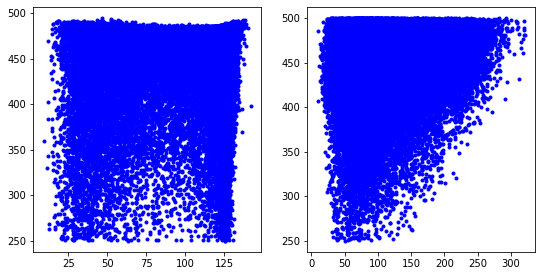

In [10]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, pt_h, '.b');
axes[1].plot(mass_q, pt_q, '.b');

Ooh, now thats interesting. For the higgs data, there is a less dense part inbetween about 40 to 120 GeV of mass, but for the QCD background the mass increases linearly.

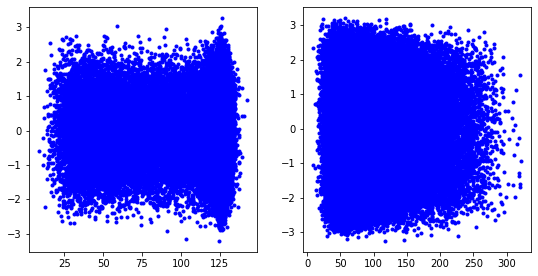

In [11]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, eta_h, '.b');
axes[1].plot(mass_q, eta_q, '.b');

This isn't especially interesting, except that it seems a wider pseudorapidity is possible for the higgs data when the particle has more mass.

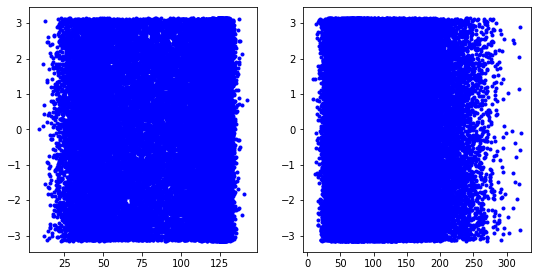

In [12]:
# Azimuthal angle
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, phi_h, '.b');
axes[1].plot(mass_q, phi_q, '.b');

Nothing interesting here.

Moving on to ee2. This is the 2-point energy correlation function ratio. This function gives us a discriminator to determine if the given data is a 2 prong jet substructure without requiring subjets discovery algorithyms. It is based on momentum and pseudorapidity, so I will graph ee2 versus both of those, in addition to a histogram of the ee2 values.

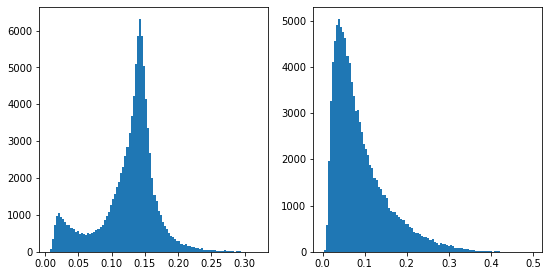

In [13]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(ee2_h, bins=100);
axes[1].hist(ee2_q, bins=100);

This result indicates to me that if we get a measurement outside of the range from 0.1 to 0.15, it is highly likely we are getting a higgs measurement. It is much more likely for a higgs measurement to be inbetween those values then it is to be background.

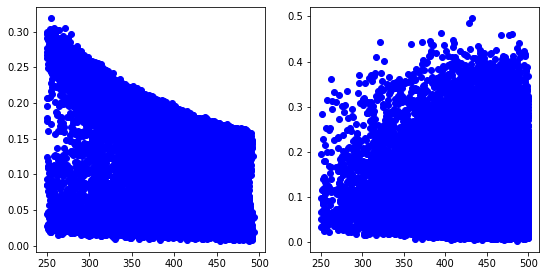

In [14]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, ee2_h, 'ob');
axes[1].plot(pt_q, ee2_q, 'ob');

This one is pretty interesting. It seems that there is some sort of exponential decay in ee2 value over momentum for higgs data, and some sort of logarithmic growth over momentum for background data. It should be much easier to detect lower momentum higgs particles, and it is easy to discard values for high momentum ee2 value.

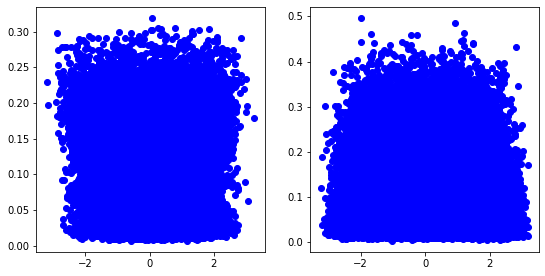

In [15]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, ee2_h, 'ob');
axes[1].plot(eta_q, ee2_q, 'ob');

This data has an interesting parabolic shape to it around 0 facing downwards in the background data, and more of an hour glass shape for the higgs data. We would struggle to distinguish near 0 pseudorapid particles, and particles with low ee2 value.

For ee3, it is a similar value to that of ee2, except that it is an observable to detect 3 prong jet structure. It is similarly dependent on momentum and pseudorapidity.

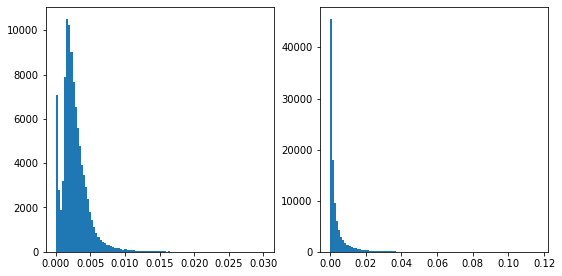

In [16]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(ee3_h, bins=100);
axes[1].hist(ee3_q, bins=100);

This seems like a similar idea to previous. There is a very large spike between 0.0025 to 0.005 for higgs data as opposed to that of the background.

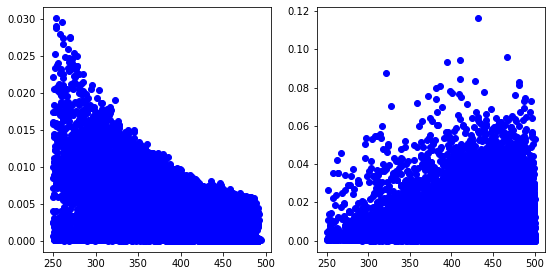

In [17]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, ee3_h, 'ob');
axes[1].plot(pt_q, ee3_q, 'ob');

Much like ee2, this one again has an exponential decay over momentum for higgs data and logarithmic growth over momentum for the background data. This will allow very easily for detection of low momentum, high ee3 value higgs data particles.

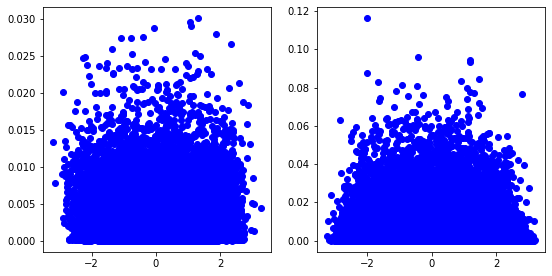

In [18]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, ee3_h, 'ob');
axes[1].plot(eta_q, ee3_q, 'ob');

This again has a parabolic shape for the background data. Unfortunately, higgs data has a less easily defined shape for this one, and would be much more difficult to identify these higgs data particles.

d2 is the 3 to 2 point ratio. It will be ee3 / ee2^3, so it is going to be dependent on momentum and pseudorapidity as well. d2 was designed to be a better discrimanating observable, so I have high hopes here.

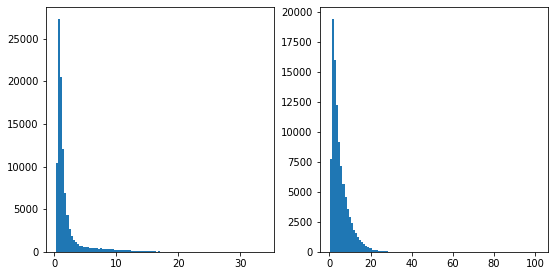

In [19]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(d2_h, bins=100);
axes[1].hist(d2_q, bins=100);

This so far looks less helpful. Its about the same shape for both, though for the higgs data the d2 value decays much faster then the background data.

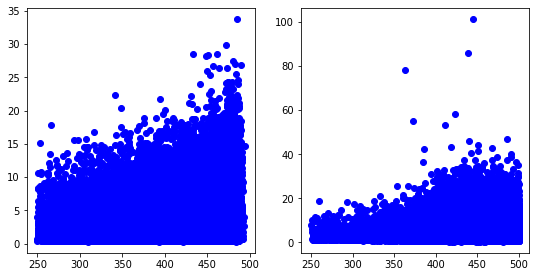

In [20]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, d2_h, 'ob');
axes[1].plot(pt_q, d2_q, 'ob');

These are the same shape now which initially seems unhelpful. There is some more discrimination with the higher momentum with the background value having higher values then the higgs data, which I suppose is helpful.

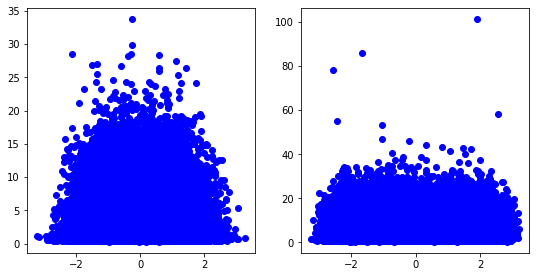

In [21]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, d2_h, 'ob');
axes[1].plot(eta_q, d2_q, 'ob');

Now this is an interesting one. There is now a parabolic shape to the higgs data. However, this would specifically cut the same sort of values as previously for ee2 and ee3. This d2 observable seems pretty unexceptional, I'm not impressed.

ang is the angularity value for this data. Angularity describes the radiation pattern of the jets. It is related to the angle, momentum, and pseudorapidity.

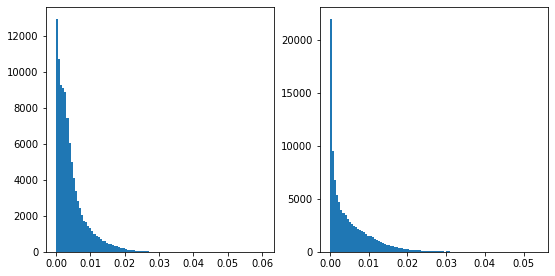

In [22]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(ang_h, bins=100);
axes[1].hist(ang_q, bins=100);

There seems to be far more values of higher angularity for the background then for the higgs data, meaning high angularity values can be safely ignored.

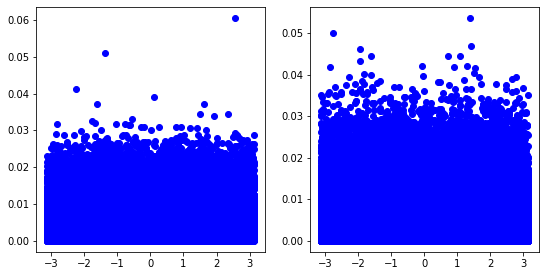

In [23]:
# phi (azimuthal angle)
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(phi_h, ang_h, 'ob');
axes[1].plot(phi_q, ang_q, 'ob');

This seems extremely uninteresting. There is a very limited difference between these values, this will not discriminate values well.

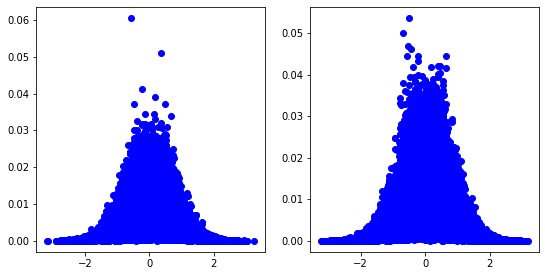

In [24]:
# psuedorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, ang_h, 'ob');
axes[1].plot(eta_q, ang_q, 'ob');

There seems like a slightly sharper gaussian distribution for the background then the value for the higgs data. This test would be able to throw out data that has high angularity to it.

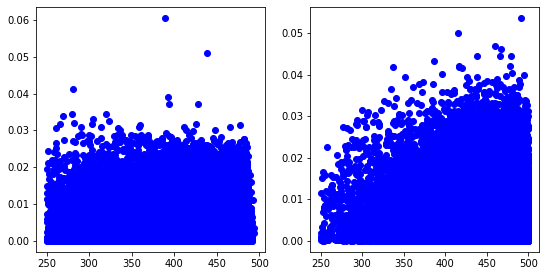

In [25]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, ang_h, 'ob');
axes[1].plot(pt_q, ang_q, 'ob');

This one would be able to select low momeentum, high angularity values as probably higgs data particles.

The next values are going to be t1, t2, and t3. I couldn't find much about what these were online, other than its called "thrust". As you can imagine, typing "jet thrust definition" into google is not going to get many relevant results. Based on name alone, I'm going to guess that it might relate to mass and momentum, and I am unsure what the difference between t1, t2, and t3 will be so I'm going to do all of them here.

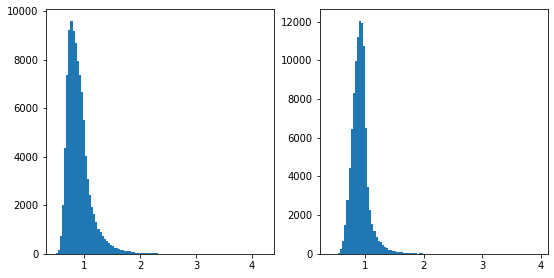

In [26]:
# histogram t1
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(t1_h, bins=100);
axes[1].hist(t1_q, bins=100);

These values seem very similar, this will not be useful for determining which group a particle belongs to.

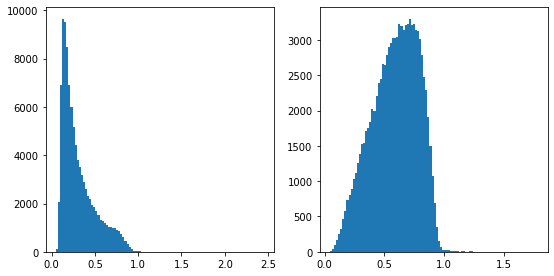

In [27]:
# histogram t2
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(t2_h, bins=100);
axes[1].hist(t2_q, bins=100);

This one is far more interesting, with a definite spike of low t2 value for higgs data, and most probably a high value of t2 data for background data. This would descriminate particles fairly well I would imagine.

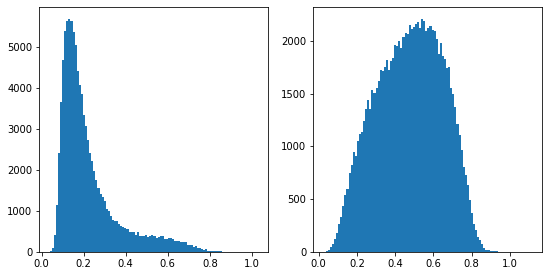

In [28]:
# histogram t3
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(t3_h, bins=100);
axes[1].hist(t3_q, bins=100);

This one has a similar discrimanatory property of the higgs data versus the background. Low t3 is likely higgs data, and high t3 is likely background data. t2 and t3 seem like they will be among the most useful discriminators so far.

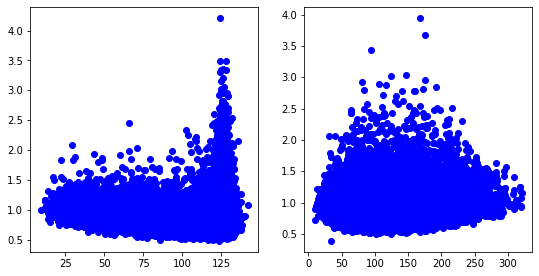

In [29]:
# mass versus t1
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, t1_h, 'ob');
axes[1].plot(mass_q, t1_q, 'ob');

There is a very interesting spike in t1 value for high mass for higgs data, and more of an oval shape for background data. This could be useful for identifying high mass higgs data particles.

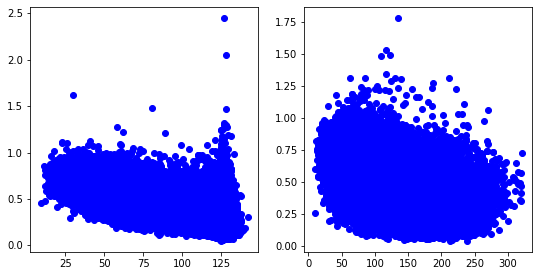

In [30]:
# mass versus t2
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, t2_h, 'ob');
axes[1].plot(mass_q, t2_q, 'ob');

The spike for high mass particles is smaller for t2 then it was for t1. This seems like a less useful discriminator than t1 is for this task.

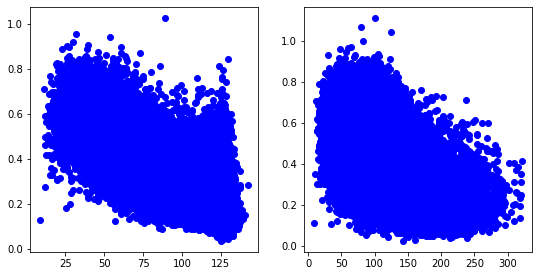

In [31]:
# mass versus t3
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, t3_h, 'ob');
axes[1].plot(mass_q, t3_q, 'ob');

This is the least useful of them all, not providing any particularly strong distinguishing features between higgs data and background.

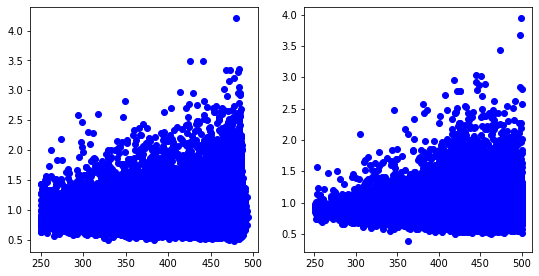

In [32]:
# momentum t1
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, t1_h, 'ob');
axes[1].plot(pt_q, t1_q, 'ob');

I had high hopes for t1 given that momentum and mass are related, but the differences are less durastic then previously. It does seem like the t1 value dues increase more rapidly for higgs data then for the background, but at this momentum range it is hard to tell.

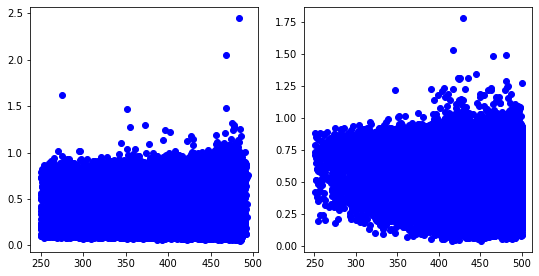

In [33]:
# momentum t2
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, t2_h, 'ob');
axes[1].plot(pt_q, t2_q, 'ob');

The differences here are fairly negligable between the background and the higgs data, with the noteable exception of higgs data particles being able to have low t2 value, low momentum particles.

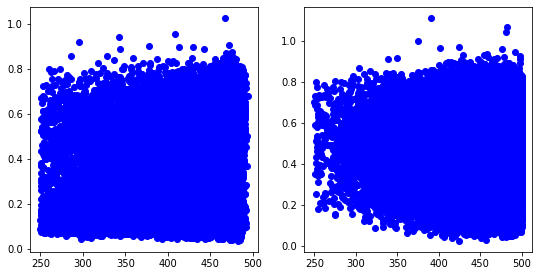

In [34]:
# momentum t3
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, t3_h, 'ob');
axes[1].plot(pt_q, t3_q, 'ob');

Like t2 before it, t3 seems to indicate that we can positively identify higgs data particles that have low momentum and low t3 value.

Next, we will look at t21 and t32. These could either be the 21 and 32 "level" of thrust, or (and I find this more likely), the value of some operation of one "level" by the other. I have no idea what to expect, but I will measure against mass and momentum again.

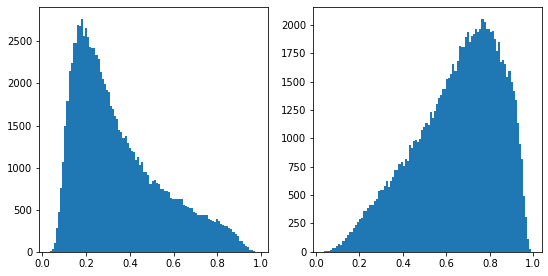

In [35]:
# histogram t21
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(t21_h, bins=100);
axes[1].hist(t21_q, bins=100);

This histogram wouldd seem to confirm my feeling, there is a peak of low t21 value for higgs data and a peak of high t21 value for background data. This seems like a similarly good discriminator.

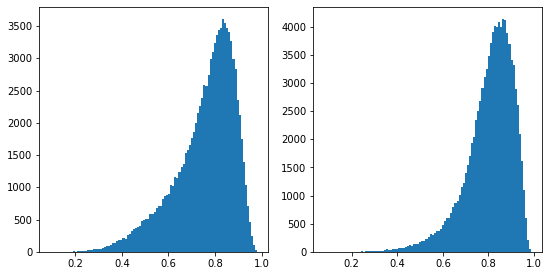

In [36]:
# histogram t32
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(t32_h, bins=100);
axes[1].hist(t32_q, bins=100);

This histogram seems much worse then either t2 or t3 is. Based on that information, I wonder if it is some sort of division or subtraction going on between the two t values. This data looks nearly identical in shape.

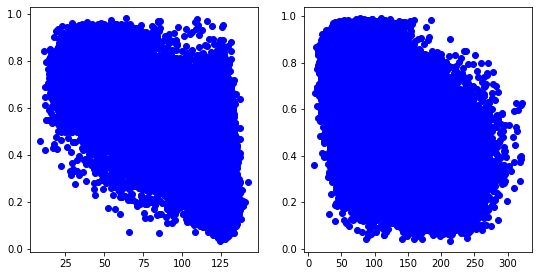

In [37]:
# mass t21
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, t21_h, 'ob');
axes[1].plot(mass_q, t21_q, 'ob');

This graph indicates that we can probably positively identify higgs data if a particle has high t21 and high mass, and identify background data with low t21 data and low mass.

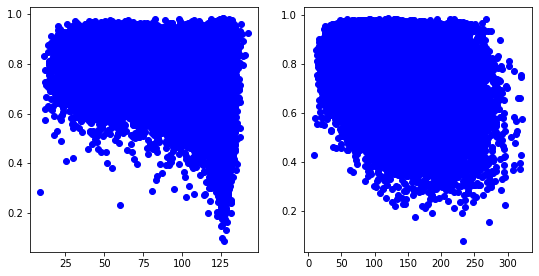

In [38]:
# mass t32
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, t32_h, 'ob');
axes[1].plot(mass_q, t32_q, 'ob');

This graph indicates that we can identify higgs data particles if they hhave high mass and low t32 value.

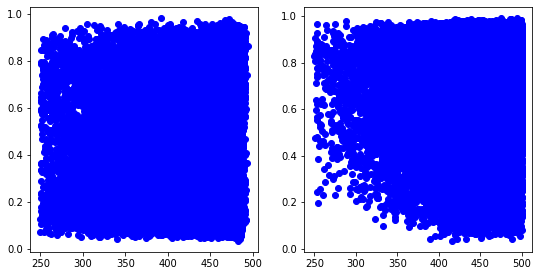

In [39]:
# momentum t21
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, t21_h, 'ob');
axes[1].plot(pt_q, t21_q, 'ob');

Based on this data, we will be able to identify higgs data particles with low momentum and low t21 value.

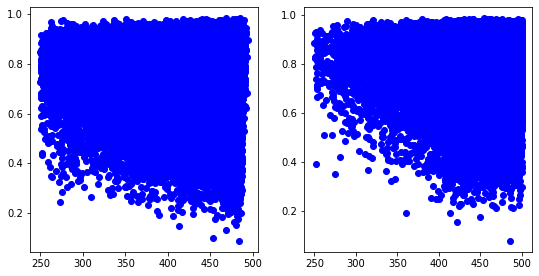

In [40]:
# momentum t32
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, t32_h, 'ob');
axes[1].plot(pt_q, t32_q, 'ob');

This one has similar discriminatory power to the t21, though it it is much closer and should probably be ignored over analyzing t21. 

Finally, we look at the KtDeltaR value, which is the delta R radial distance between two subjets within the same larger subset of jets. Based on this being a radial distance, I will check how it compares to pseudorapidity and to azimuthal angle.

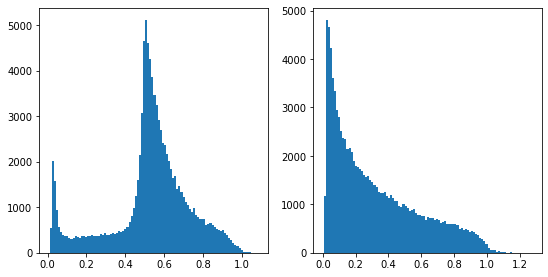

In [41]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(KtDeltaR_h, bins=100);
axes[1].hist(KtDeltaR_q, bins=100);

According to this, it seems likely that background data particles have a very low delta R, and that higgs data particles have a roughly 0.55 delta R. How interesting.

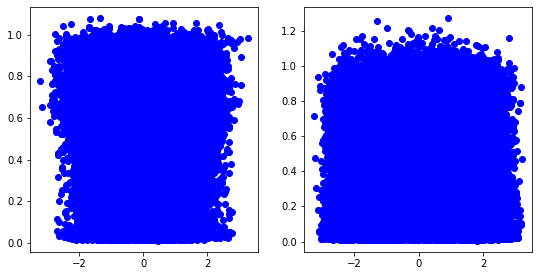

In [42]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, KtDeltaR_h, 'ob');
axes[1].plot(eta_q, KtDeltaR_q, 'ob');

There seems to be very little difference between these two. I suppose pseudorapidity has limited say in delta R.

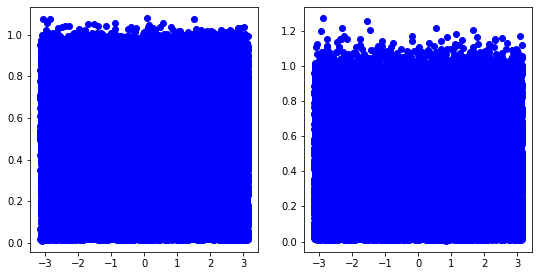

In [43]:
# phi (azimuthal angle)
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(phi_h, KtDeltaR_h, 'ob');
axes[1].plot(phi_q, KtDeltaR_q, 'ob');

This one also has very little bearing on delta R. I find this a little surprising, I would have thought angle would matter for the distance. I suppose I will check momentum now, to see if how fast the particle moves indicates anything.

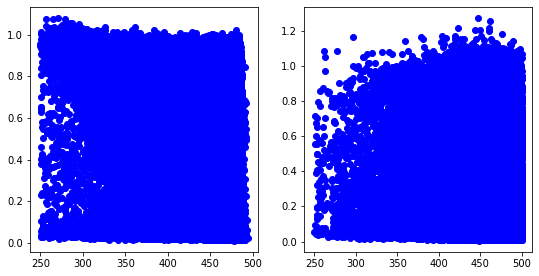

In [44]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, KtDeltaR_h, 'ob');
axes[1].plot(pt_q, KtDeltaR_q, 'ob');

This indicatates that you can be some what sure it is a higgs data particle if it is low momentum and high delta R. This doesn't make sense to me, but that's ok I suppose. I will think about this for a little while.